In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
%matplotlib inline

In [2]:
import qlib
from qlib.data import D

In [3]:
qlib.init(provider_uri="~/.qlib/qlib_data/cn_fund_data")
# accumulated value 累计净值
fields = ['$LJJZ', '$LJJZ/Ref($LJJZ, 1)-1']

df = D.features(D.instruments(market="all"), fields, start_time="2021-06-01", end_time="2021-06-05", freq="day")

[6216:MainThread](2021-06-13 18:10:02,727) INFO - qlib.Initialization - [config.py:276] - default_conf: client.
[6216:MainThread](2021-06-13 18:10:04,756) WARNING - qlib.Initialization - [config.py:292] - redis connection failed(host=127.0.0.1 port=6379), cache will not be used!
[6216:MainThread](2021-06-13 18:10:06,010) INFO - qlib.Initialization - [__init__.py:46] - qlib successfully initialized based on client settings.
[6216:MainThread](2021-06-13 18:10:06,011) INFO - qlib.Initialization - [__init__.py:47] - data_path=C:\Users\daoz\.qlib\qlib_data\cn_fund_data


In [4]:
from qlib.data.monitor.detector import NDDetector
ndDetector = NDDetector()
ndDetector.fit(df['$LJJZ/Ref($LJJZ, 1)-1']["000001"])
print (ndDetector.__dict__)

{'n': 3, 'mean': -0.0008741468, 'std': 0.004860029}


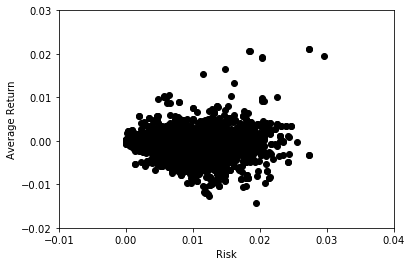

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.xlim((-0.01, 0.04))
plt.ylim((-0.02, 0.03))
plt.xlabel("Risk")
plt.ylabel("Average Return")

count = 0
returnList = []
riskList = []
for fund in D.list_instruments(instruments=D.instruments(market="all")).keys():
    try:
        ndDetector.fit(df['$LJJZ/Ref($LJJZ, 1)-1'][fund])
        #plt.text(ndDetector.mean, ndDetector.std, fund, fontsize=10)
        returnList.append(ndDetector.mean)
        riskList.append(ndDetector.std)
        if count >= 10000:
            break
        count += 1
    except:
        continue

plt.scatter(riskList, returnList, c='k')
plt.show()